https://www.zinkov.com/posts/2015-06-09-where-priors-come-from/

In [86]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt
import math


In [92]:
plt.style.use('bmh')
def display_histogram(dist, samples=10000, **kwargs):
    plt.hist(dist(samples), **kwargs)

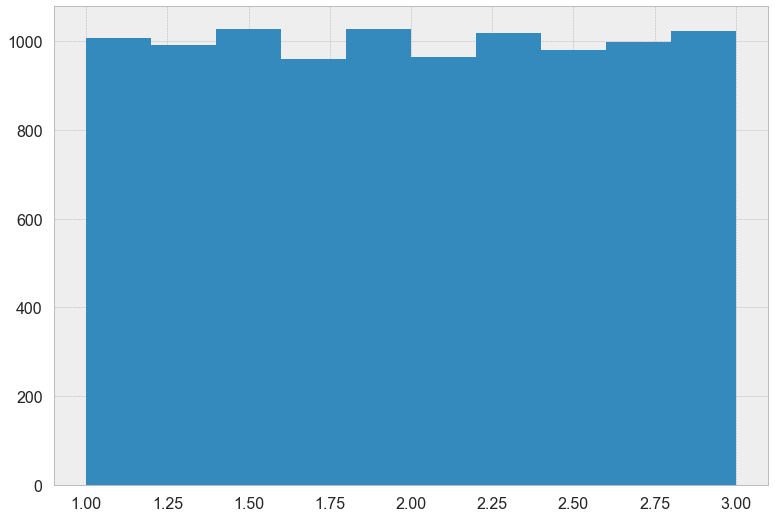

In [93]:
def uniform(lo, hi):
    return lambda samples: r.uniform(lo, hi, samples)

display_histogram(uniform(1, 3))

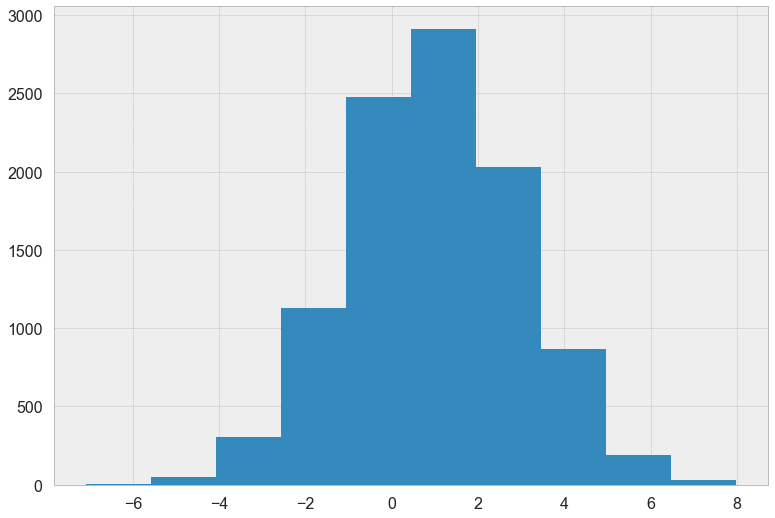

In [94]:
def normal(mu, sd):
    return lambda s: r.normal(mu, sd, s)

display_histogram(normal(1, 2))

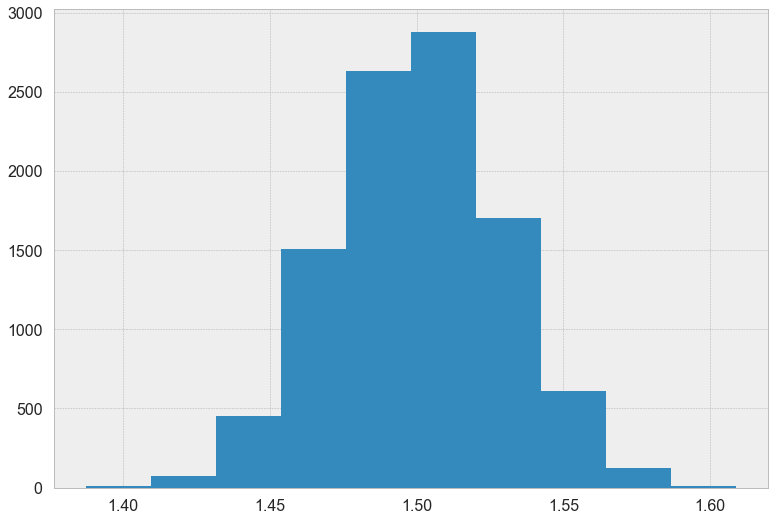

In [95]:
def clt(samples):
    return np.array([np.mean(r.uniform(1, 2, 100))
                     for i in range(samples)])
display_histogram(clt)

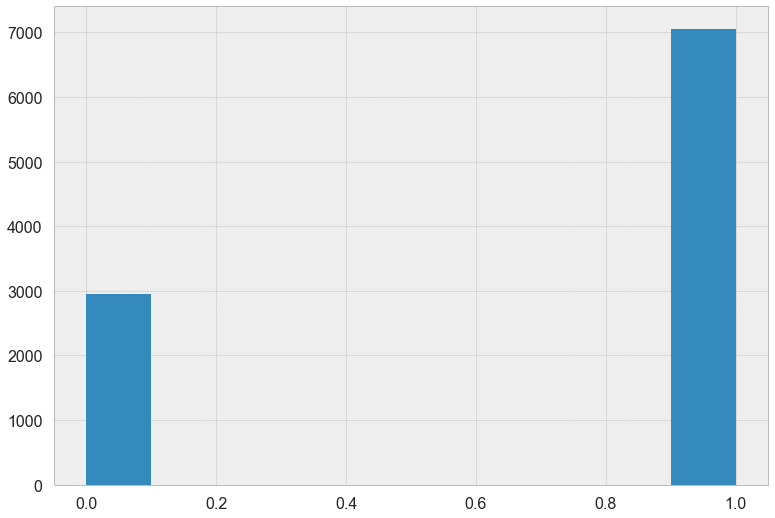

In [96]:
def bern(p):
    def samples(s):
        u = r.uniform(0, 1, s)
        return np.where(u < p, 1, 0)
    return samples

display_histogram(bern(0.7))

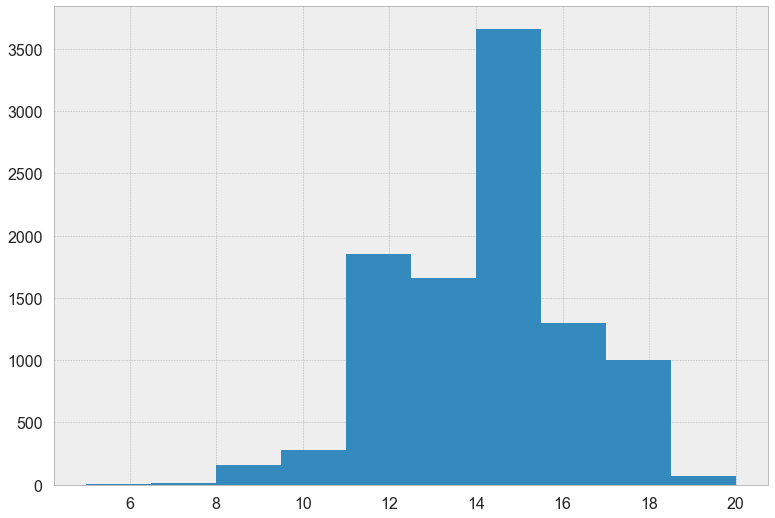

In [97]:
def binomial(n, p):
    def samples(s):
        k = [np.sum(bern(p)(n)) for s in range(s)]
        return np.array(k)
    return samples

display_histogram(binomial(20, 0.7))

Coin is flipped 20 times for 10000 times.  
From hist,  
(if heads = true/1)  
Out of 20, the coin landed heads 14 times for ~ 3500 times  

In [98]:
def categorical(ps):
    def samples(s):
        return r.choice(range(len(ps)), s, p=ps)
    return samples

In [99]:
categorical([0.2, 0.5, 0.3])(10)

array([0, 1, 0, 2, 2, 2, 1, 1, 1, 1])

In [100]:
def onehot(n, k):
    return np.eye(1, n, k=k)[0]


def categorical2(ps):
    def samples(s):
        l = len(ps)
        return np.array([onehot(l,
                                r.choice(range(l),  p=ps))
                         for i in range(s)])
    return samples


In [101]:
categorical2([0.2, 0.5, 0.3])(5)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

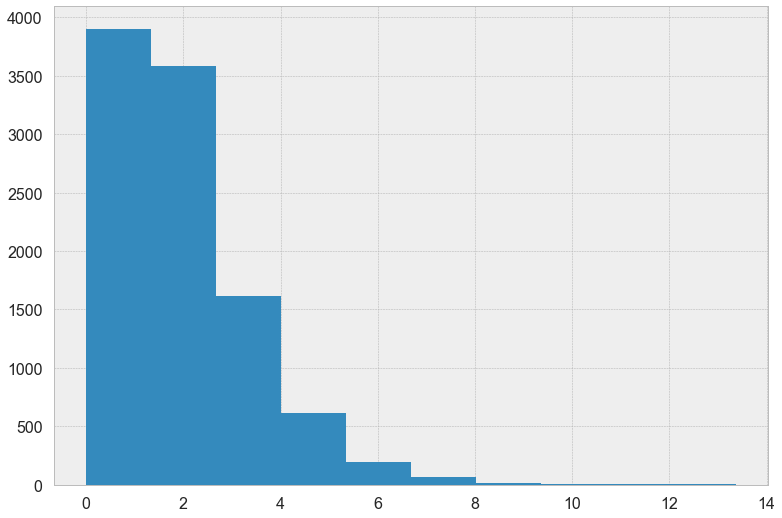

In [122]:
def gamma(shape, scale):
    return lambda s: r.gamma(shape, scale, s)

display_histogram(gamma(2, 1), 10000)

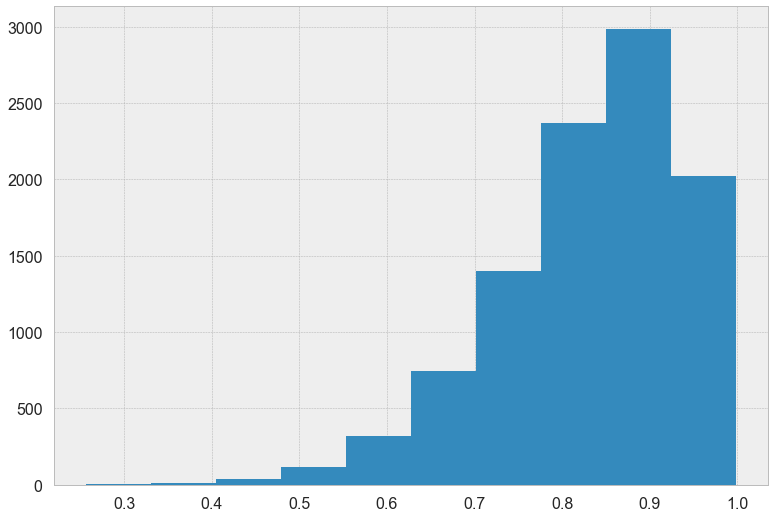

In [120]:
def beta(a, b):
    def samples(s):
        x = r.gamma(a, 1, s)
        y = r.gamma(b, 1, s)
        return x/(x + y)
    return samples

display_histogram(beta(10, 2), 10000)